# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [52]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [53]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [54]:
df = pd.read_csv('../data.csv')

In [55]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [56]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [57]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


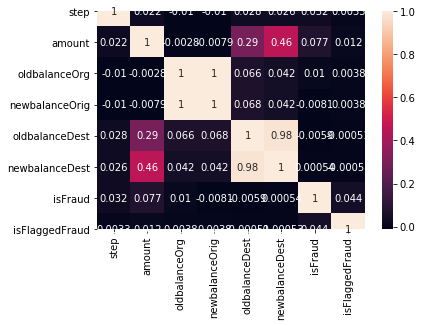

In [59]:
sns.heatmap(df.corr(), annot=True)

### What is the distribution of the outcome? 

In [60]:
df['isFraud'].value_counts()/len(df)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

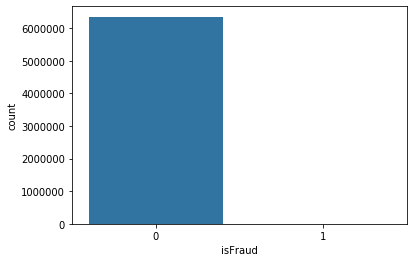

In [61]:
# Your response here
sns.countplot(x ='isFraud', data=df)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [62]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


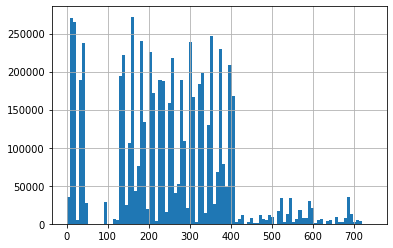

In [63]:
# Your code here
df['step'].hist(bins = 100)

In [64]:
df['hour'] = df['step']%24

In [65]:
#Hacemos drop de aquellas columnas que tiene una correlacion muy alta y aquellas que tienen demasiadas categorias. 
#Tambien hacemos drop de step ya que ahora la usearmeos como hora

df.drop(columns = ['oldbalanceOrg','oldbalanceDest','nameOrig','nameDest','step'], inplace = True)

In [66]:
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,hour
0,PAYMENT,9839.64,160296.36,0.0,0,0,1
1,PAYMENT,1864.28,19384.72,0.0,0,0,1
2,TRANSFER,181.00,0.00,0.0,1,0,1
3,CASH_OUT,181.00,0.00,0.0,1,0,1
4,PAYMENT,11668.14,29885.86,0.0,0,0,1


### Run a logisitc regression classifier and evaluate its accuracy.

In [67]:
def baseline_report(model, X_train, y_train, name):
    strat_k_fold = StratifiedKFold(n_splits=2, shuffle=True)
    model.fit(X_train, y_train)
    print(name)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy'))
    print(accuracy)
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision'))
    print(precision)
#    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall'))
#    print(recall)
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1'))
    print(f1score)
    #rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc'))


    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
#                             'recall'       : [recall],
                             'f1score'      : [f1score],
#                             'rocauc'       : [rocauc],
                            })
    return df_model

In [68]:
df = pd.get_dummies(df, columns = ['type'])

In [23]:
df.head()

,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,160296.36,0.0,0,0,1,0,0,0,1,0
1,1864.28,19384.72,0.0,0,0,1,0,0,0,1,0
2,181.00,0.00,0.0,1,0,1,0,0,0,0,1
3,181.00,0.00,0.0,1,0,1,0,1,0,0,0
4,11668.14,29885.86,0.0,0,0,1,0,0,0,1,0


In [35]:
X = df.drop(columns = 'isFraud')
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

#### logistic without undersampling

In [25]:
models_df_ = baseline_report(LogisticRegression(), X_train, y_train, 'logit')

logit
0.9982599542326903
0.25035610939177777
0.19932904821841388


In [26]:
models_df_

,model,accuracy,precision,f1score
0,logit,0.99826,0.250356,0.199329


#### Underbalance

In [28]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [29]:
#nr = NearMiss(version = 3)
#X_train, y_train = nr.fit_sample(X_train, y_train)

In [36]:
rus = RandomUnderSampler(sampling_strategy = 'majority')
X_train, y_train = rus.fit_sample(X_train, y_train)

In [37]:
X_train.shape

(13186, 10)

### Now pick a model of your choice and evaluate its accuracy.

In [38]:
models = {  'gnb': GaussianNB(),
#            'bnb': BernoulliNB(),
#            'mnb': MultinomialNB(),
            'logit': LogisticRegression(),
            'knn': KNeighborsClassifier(),
            'decisiontree': DecisionTreeClassifier(),
            'randomforest': RandomForestClassifier(),
#            'svc': SVC(probability=True),
#            'linearsvc': LinearSVC()
         }

In [39]:
models_df_ = pd.concat([baseline_report(
    model, X_train, y_train, name) for (name, model) in models.items()])



gnb
0.6463673593204915
0.9173390390730058
0.48160959231753553
logit
0.6763992112846959
0.620788325398433
0.7401453580738604
knn
0.8073714545730319
0.8154577600325474
0.8070716264332074
decisiontree
0.8925375398149553
0.8976254667888552
0.8944908861611786
randomforest
0.9115728803276202
0.9274058485136736
0.9107956690343216


In [40]:
models_df_

,model,accuracy,precision,f1score
0,gnb,0.646367,0.917339,0.481610
0,logit,0.676399,0.620788,0.740145
0,knn,0.807371,0.815458,0.807072
0,decisiontree,0.892538,0.897625,0.894491
0,randomforest,0.911573,0.927406,0.910796


In [ ]:
#podriamos tomar Random forest como el modelo que funciona major ya que tiene todos los indicadores por encima del 90%
#A continuacion lo comprobaremo con los datos de test para comprobar que asi sea.

### Which model worked better and how do you know?

In [50]:
# Your response here
for name, model in models.items():
    print(name)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

gnb
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270904
           1       0.01      0.31      0.02      1620

    accuracy                           0.96   1272524
   macro avg       0.51      0.64      0.50   1272524
weighted avg       1.00      0.96      0.98   1272524

logit
              precision    recall  f1-score   support

           0       1.00      0.46      0.63   1270904
           1       0.00      0.91      0.00      1620

    accuracy                           0.46   1272524
   macro avg       0.50      0.68      0.32   1272524
weighted avg       1.00      0.46      0.62   1272524

knn
              precision    recall  f1-score   support

           0       1.00      0.83      0.91   1270904
           1       0.01      0.80      0.01      1620

    accuracy                           0.83   1272524
   macro avg       0.50      0.82      0.46   1272524
weighted avg       1.00      0.83      0.90   1272524

decis

In [ ]:
#Vemos que random forest nos da muy buenos resultados